**Biomechanical Orthopedic Patients Classification Using Pytorch Tensor**

In this notebook I am going to build a Logistic Regression model using Pytorch Tensor instead of using Numpy ndarray.Logistic Regression will be written without any help of ML packages. Pytorch Tensor is a class alomost similar to what we use in numpy ndarray. Pytorch Tensor are advantageous while doing complex and bigger numerical computation , as it uses the GPU to speed up the computation speed as much as 50X.

In [16]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

column_2C_weka.csv
column_3C_weka.csv



In [17]:
train_df = pd.read_csv('../input/column_2C_weka.csv')
train_df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


We take a look at the frequency of the classes 'Normal' and 'Abnormal' in the data.It is a well balanced data.

In [18]:
print('shape of the data = '+str(train_df.shape))
train_df['class'].value_counts()


shape of the data = (310, 7)


Abnormal    210
Normal      100
Name: class, dtype: int64

Here we import the pytorch library and a very important practise to do in torch is setting the datatype of the tensors form the beginning . 

In [19]:
import torch
dtype = torch.FloatTensor

Here we do some data preprocessing job by mapping the class column to {0,1} and then we transform the dataframe to numpy matrix .Then the numpy matrix is converted in to torch.Tensor object using torch.form_numpy() method.

In [20]:
dict1 = {'Normal':0 , 'Abnormal':1}
train_df['class'] = train_df['class'].map(dict1)
target = train_df['class'].values
del train_df['class']
train_x = train_df.as_matrix()
x_tor = torch.from_numpy(train_x)

Print the shape of the torch Tensor object using shape attribute as we do with numpy array

In [21]:
x_tor.shape

torch.Size([310, 6])

We also transform the target class variable into torch.Tensor.

In [22]:
y_tor = torch.from_numpy(target).type(dtype)
y_tor.shape

torch.Size([310])

Now we start the first part of implementing Logistic Regression algorithm that is initializing the parameters and hyperparameters.
We initialize the parameters W using torch.zeros() and then type casting using type function. b is set to zero. Learning rate or alpha is set very small to prevent the log loss from going to nan . No of iterations is set to 5000.

In [23]:
n_feature = x_tor.shape[1]
n_output = 1
W = torch.zeros(n_output,n_feature).type(dtype)
b = 0
alpha = .00000002
n_iter = 5000

We implment the algorithm . First we write the forward propagation to get y_pred ,then computing the cost .Then find the gradient of the log loss function and then updating W,b according to the Batch Gradient Descent algorithm. We store the loss values in cost list .


In [24]:
cost = []
iter = []
x_train = x_tor.t().type(dtype)
m = x_tor.shape[0]
for t in range(n_iter):
    ## forward propagatiop
    z = W.mm(x_train)+b
    y_pred = torch.sigmoid(z).type(dtype)
    
    ## computing log loss 
    loss = -(torch.sum(torch.log(y_pred)*y_tor)+torch.sum(torch.log(1-y_pred)*(1-y_tor)))/m
    cost.append(loss)
    iter.append(t)
    
    ## computing the gradient
    dW = x_train.mm((y_pred-y_tor).t())
    db = torch.sum((y_pred-y_tor).t())
    
    ##updating W,b
    W = W - alpha*dW.t()
    b = b - alpha*db

Uisng matplotlib we plot the cost in each iteration and we see that the loss function is decreasing in each iteration . So our algorithm works well .

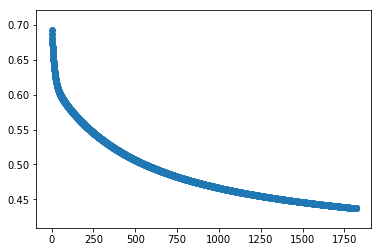

In [25]:
import matplotlib.pyplot as plt
plt.scatter(iter,cost)
plt.show()

In [26]:
print('Parameters after training = ',W,b)

Parameters after training =  
1.00000e-02 *
  1.3023  1.7896  0.3414 -0.4872 -1.0355  6.2318
[torch.FloatTensor of size 1x6]
 0.0002177990012231472


In [27]:
y_pred[y_pred>=.5] = 1
y_pred[y_pred<.5] = 0
print("Accuracy after training : "+str(torch.sum(y_pred==y_tor)/m))

Accuracy after training : 0.7967741935483871
